# Flight Fare Predictor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_excel("D:/Atharva/Projects/Flight Fare Predictor/Dataset/Data_Train.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data["Duration"].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA : Exploratory Data Analysis

From description we can see that Date_of_Journey is a object data type,\
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas **to_datetime** to convert object data type to datetime dtype.

<span style="color: red;">**.dt.day method will extract only day of that date**</span>\
<span style="color: red;">**.dt.month method will extract only month of that date**</span>

In [11]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [12]:
train_data["Journey_month"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [13]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
train_data.drop(["Date_of_Journey"], axis=1, inplace=True)

In [15]:
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_35260\481262791.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour


In [16]:
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_35260\3848243053.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute


In [17]:
train_data.drop(["Dep_Time"], axis=1, inplace=True)

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [19]:
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_35260\2455423579.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour


In [20]:
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_35260\1857625324.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute


In [21]:
train_data.drop(["Arrival_Time"], axis=1, inplace=True)

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [23]:
train_data.shape

(10682, 14)

In [24]:
train_data["Duration"]

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [25]:
duration = list(train_data["Duration"])
print(duration)
duration[0].split()

['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m', '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m', '12h 10m', '2h 35m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m', '5h 10m', '15h 20m', '2h 50m', '2h 55m', '13h 20m', '15h 10m', '5h 45m', '5h 55m', '2h 50m', '2h 15m', '2h 15m', '13h 25m', '2h 50m', '22h', '5h 30m', '10h 25m', '5h 15m', '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m', '2h 45m', '12h', '2h 50m', '2h 50m', '2h 15m', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '2h 50m', '3h', '2h 50m', '16h 15m', '15h 5m', '2h 15m', '6h 30m', '25h 5m', '12h 25m', '27h 20m', '10h 15m', '10h 30m', '2h 15m', '10h 25m', '2h 50m', '1h 30m', '13h 20m', '2h 15m', '1h 25m', '26h 30m', '7h 20m', '13h 30m', '5h', '2h 45m', '2h 50m', '1h 30m', '19h 5m', '2h 15m', '14h 50m', '2h 40m', '22h 10m', '9h 35m', '10h', '21h 20m', '5h 25m', '18h 45m', '12h 20m', '18h', '9h 15m', '11h 5m', '17h 30m', '13h 20m', '2h 35m', '2h 25m', '2h 40m', '3h', '1h 25m', '16h 35m

['2h', '50m']

In [26]:
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + "0m"
        else:
            duration[i] = "0h" + duration[i]
    
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(duration[i].split(sep = "h")[0])
    duration_mins.append(duration[i].split(sep = "m")[0].split(sep = "h")[-1])

In [27]:
#print(duration_hours)
print(duration_mins)

[' 50', ' 25', '0', ' 25', ' 45', ' 25', ' 30', ' 5', ' 30', ' 50', ' 15', ' 35', ' 15', ' 10', ' 35', ' 35', ' 30', ' 35', '0', ' 35', ' 10', ' 20', ' 50', ' 55', ' 20', ' 10', ' 45', ' 55', ' 50', ' 15', ' 15', ' 25', ' 50', '0', ' 30', ' 25', ' 15', ' 30', ' 15', ' 55', ' 5', ' 30', ' 5', ' 45', '0', ' 50', ' 50', ' 15', ' 5', ' 55', ' 15', ' 20', ' 50', '0', ' 50', ' 15', ' 5', ' 15', ' 30', ' 5', ' 25', ' 20', ' 15', ' 30', ' 15', ' 25', ' 50', ' 30', ' 20', ' 15', ' 25', ' 30', ' 20', ' 30', '0', ' 45', ' 50', ' 30', ' 5', ' 15', ' 50', ' 40', ' 10', ' 35', '0', ' 20', ' 25', ' 45', ' 20', '0', ' 15', ' 5', ' 30', ' 20', ' 35', ' 25', ' 40', '0', ' 25', ' 35', ' 20', ' 15', ' 30', '0', ' 45', ' 55', ' 10', ' 30', ' 20', ' 55', '0', ' 55', ' 45', ' 10', ' 55', ' 25', ' 5', ' 10', ' 40', ' 55', ' 40', ' 25', ' 5', ' 15', ' 25', ' 10', ' 10', '0', ' 50', ' 20', '0', ' 55', ' 10', ' 45', '0', ' 50', ' 40', ' 15', ' 45', ' 50', '0', ' 15', ' 25', ' 35', ' 50', ' 35', ' 25', ' 55', ' 5

In [28]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

train_data.drop(["Duration"], axis=1, inplace = True)

In [29]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [30]:
train_data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

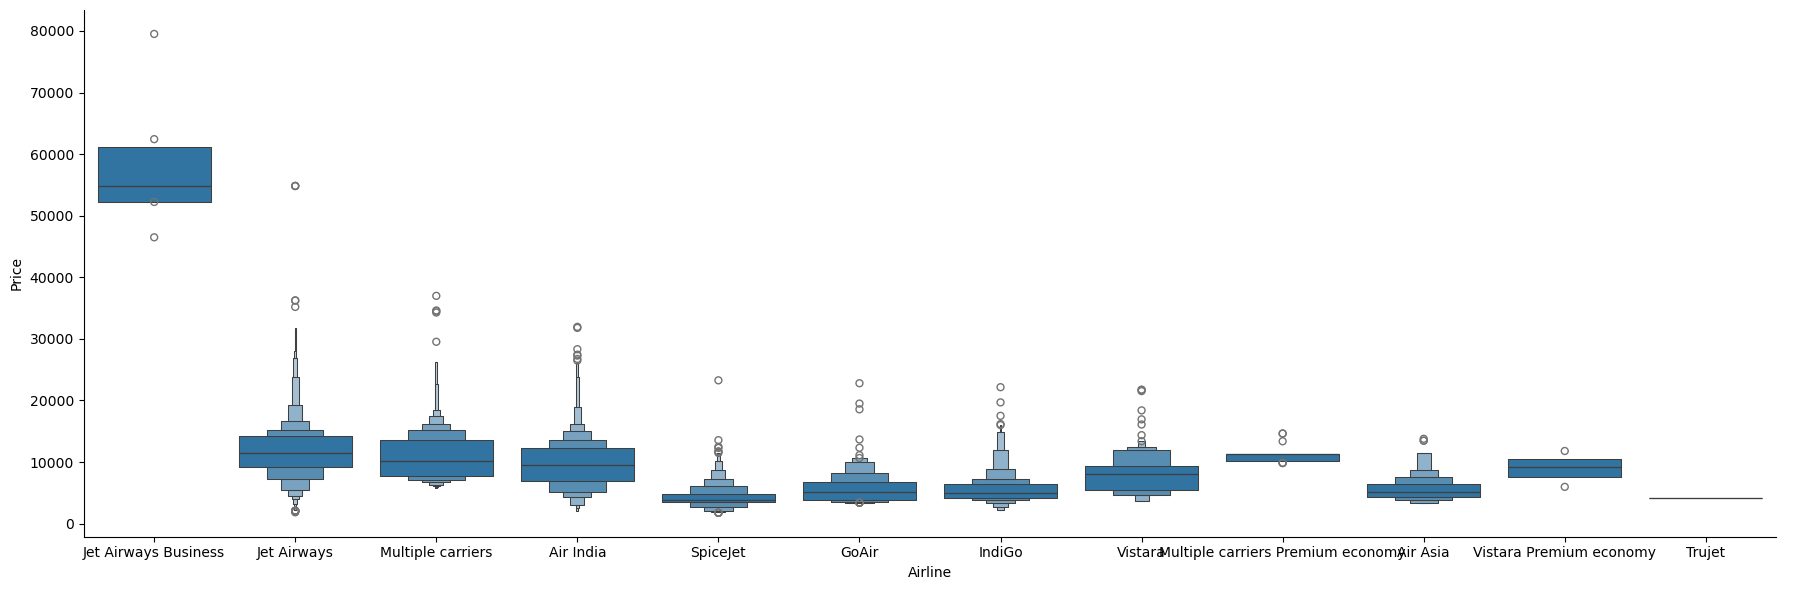

In [31]:
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind = "boxen", height=6, aspect=3)
plt.show()

In [32]:
train_data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [33]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]
# The double square brackets [[ ]] are used to ensure that the result is a DataFrame rather than a Series.

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [34]:
train_data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

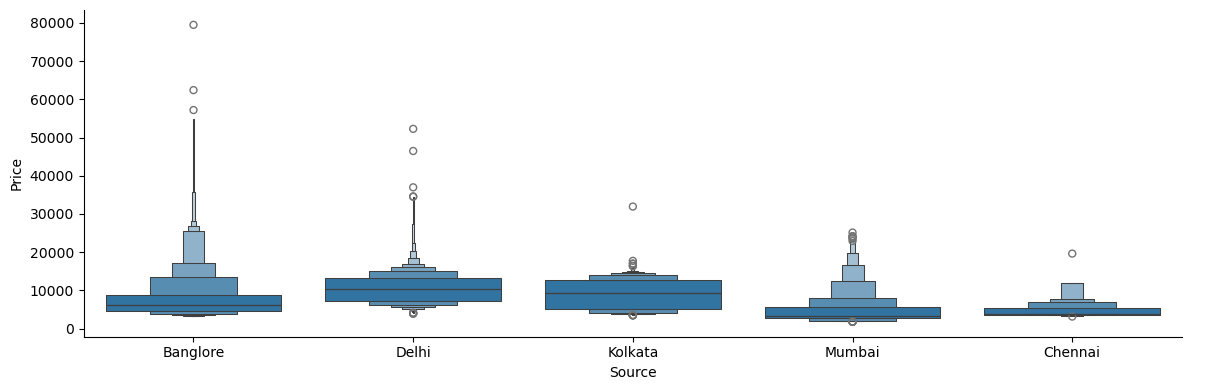

In [35]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [36]:


Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [37]:
train_data["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [38]:


Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [39]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [40]:
train_data.drop(["Route", "Additional_Info"], axis=1, inplace=True)

In [41]:
train_data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

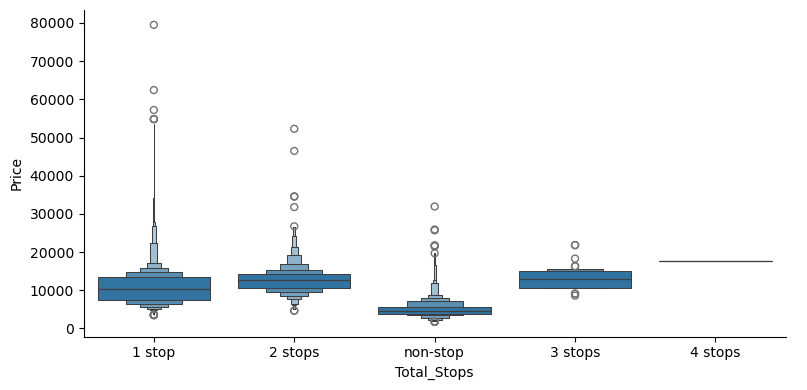

In [42]:
sns.catplot(y="Price", x="Total_Stops", data = train_data.sort_values("Price", ascending=False), kind='boxen', height = 4, aspect = 2)
plt.show()

In [43]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_35260\1758178131.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [44]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [45]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis=1)

In [46]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [47]:
data_train.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

In [48]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [49]:
#Doubt : Why isn't it needed to encode the journey day, month dep_hour........duration_mins column? Because
# all the other columns are either one hot encoded or label encoded.

In [50]:
data_train.shape

(10682, 30)

# Test Set

In [51]:
test_data = pd.read_excel("D:\Atharva\Projects\Flight Fare Predictor\Dataset\Test_set.xlsx")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_35260\1166586371.py:1: SyntaxWarning: invalid escape sequence '\A'
  test_data = pd.read_excel("D:\Atharva\Projects\Flight Fare Predictor\Dataset\Test_set.xlsx")


In [52]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [53]:
test_data.shape
#data_train.shape

(2671, 10)

In [54]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

# Test Data Preprocessing

In [55]:
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())
print()
# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_35260\3093215497.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_35260\3093215497.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_35260\3093215497.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hou

In [56]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,1,12,5,6,20,10,20,4,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1,21,5,19,15,19,0,23,45,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,21,5,8,0,21,0,13,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
4,0,24,6,23,55,2,45,2,50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


# Feature Selection

#### Finding out the best feature which will contribute and have good relation with target variable.
#### Following are some of the feature selection methods,


#### 1. <span style="color: purple;">**heatmap**</span>
#### 2. <span style="color: purple;">**feature_importance_**</span>
#### 3. <span style="color: purple;">**SelectKBest**</span>

In [57]:
data_train.shape

(10682, 30)

In [58]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [59]:
X = data_train.iloc[:, np.r_[0, 2:data_train.shape[1]]]
# shape[1] is used to dynamically determine the total number of columns
y = data_train.iloc[:, 1]

print(X)
print(y)

       Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  \
0                0           24              3        22       20   
1                2            1              5         5       50   
2                2            9              6         9       25   
3                1           12              5        18        5   
4                1            1              3        16       50   
...            ...          ...            ...       ...      ...   
10678            0            9              4        19       55   
10679            0           27              4        20       45   
10680            0           27              4         8       20   
10681            0            1              3        11       30   
10682            2            9              5        10       55   

       Arrival_hour  Arrival_min Duration_hours Duration_mins  \
0                 1           10              2            50   
1                13           15         

In [60]:
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [61]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [62]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


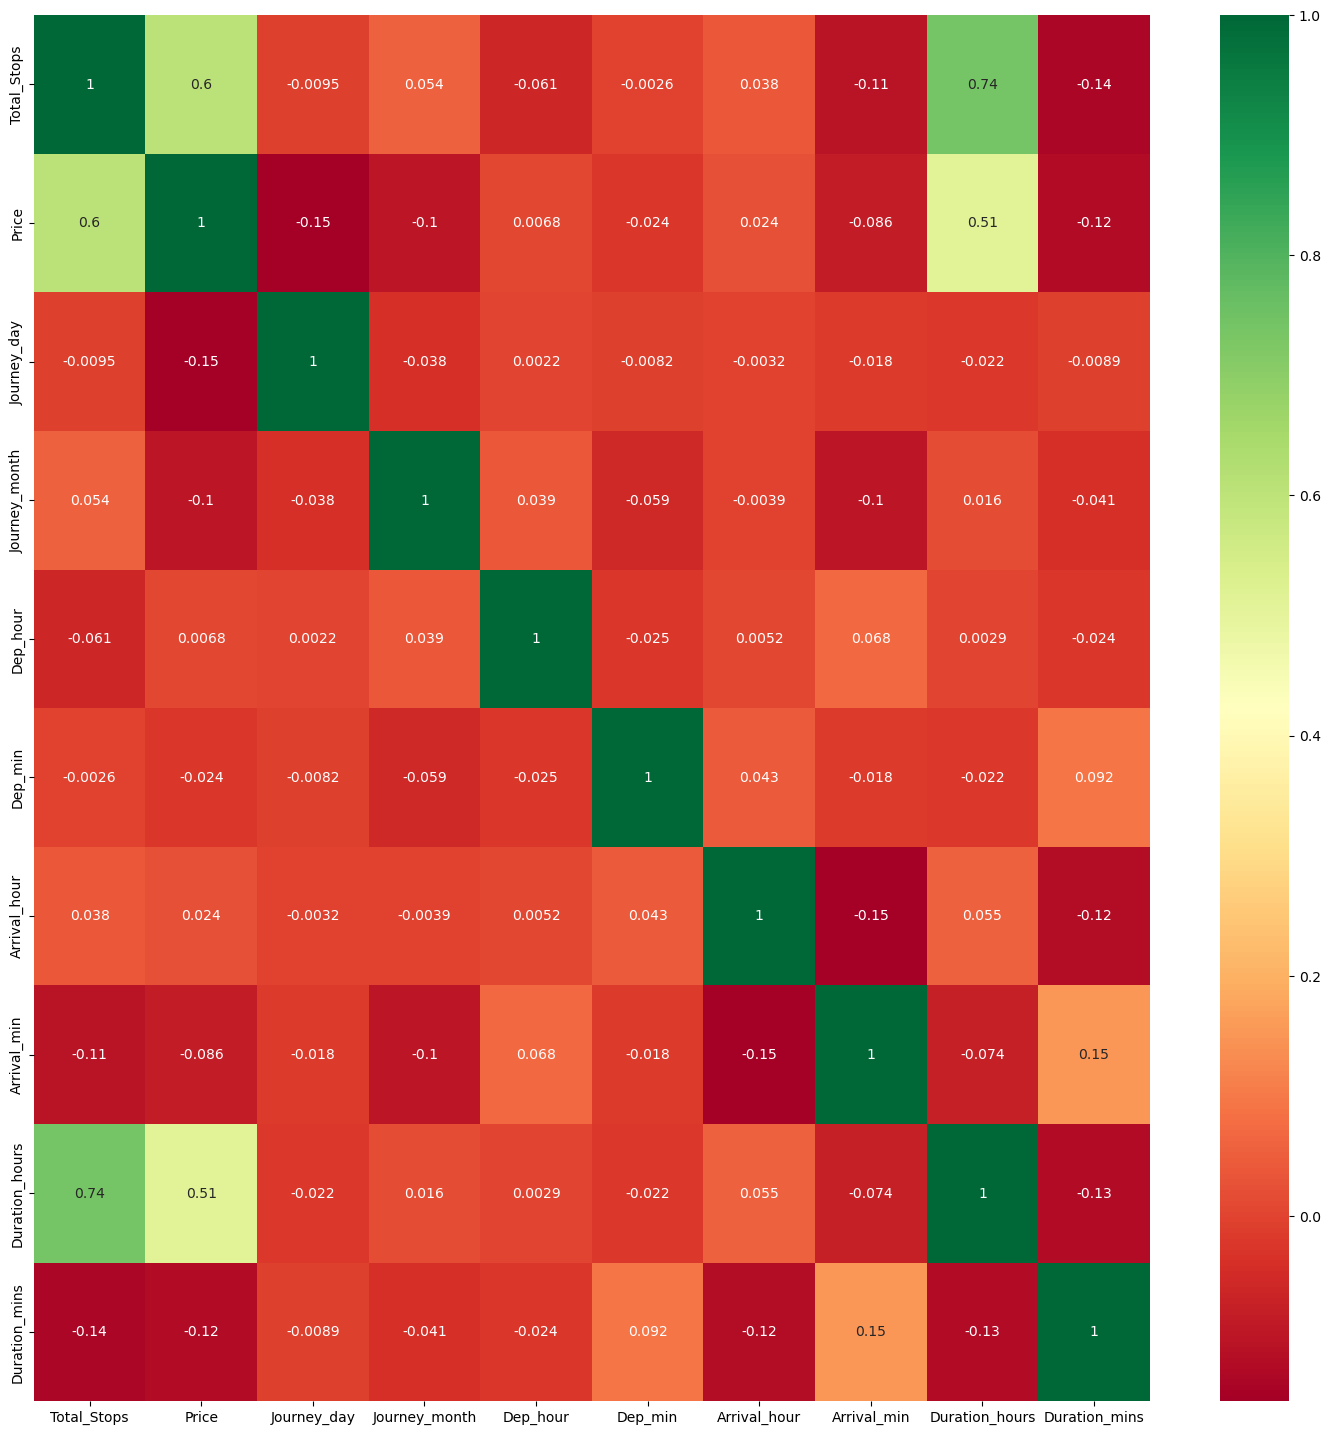

In [63]:
plt.figure(figsize = (18,18))
sns.heatmap(train_data.iloc[:, 3:].corr(), annot = True, cmap = 'RdYlGn')
# Learning : Remember that, if 2 independent features are highly correlated then we can drop one of them.
plt.show()

In [64]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [65]:
print(selection.feature_importances_)

[2.34248562e-01 1.43604363e-01 5.28881632e-02 2.41979233e-02
 2.13128256e-02 2.76915916e-02 1.92934373e-02 1.32068094e-01
 1.76874121e-02 8.88968584e-03 1.90569800e-03 1.84682228e-02
 1.32604225e-01 6.66022989e-02 1.77272555e-02 8.10579765e-04
 3.10786462e-03 9.38679259e-05 4.89581103e-03 7.61498517e-05
 4.44119107e-04 9.32865224e-03 3.46599190e-03 7.91455851e-03
 8.28668445e-03 1.22835851e-02 4.70487787e-03 4.20704716e-04
 2.49767959e-02]


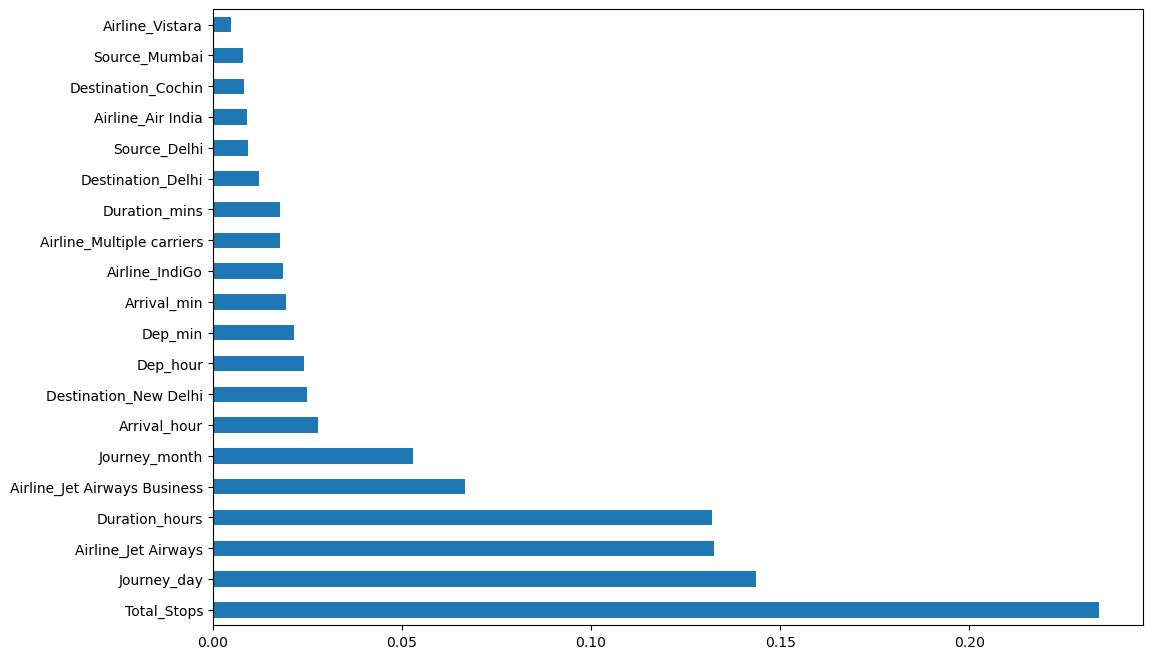

In [66]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using Random Forest

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [68]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [69]:
y_pred = reg_rf.predict(X_test)

In [70]:
reg_rf.score(X_train, y_train)

0.9536774625711621

In [71]:
reg_rf.score(X_test, y_test)

0.7971580110519103

C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_35260\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


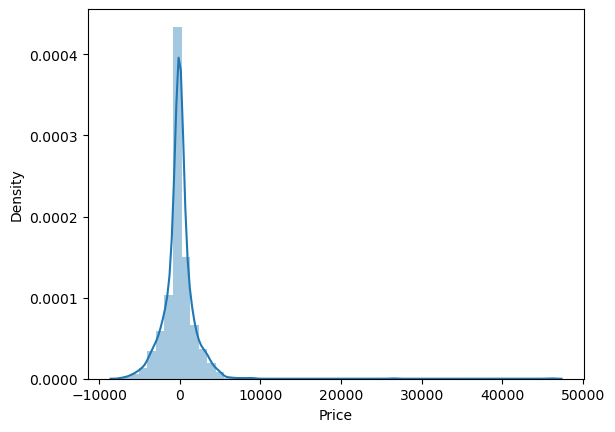

In [72]:
sns.distplot(y_test-y_pred)
plt.show()

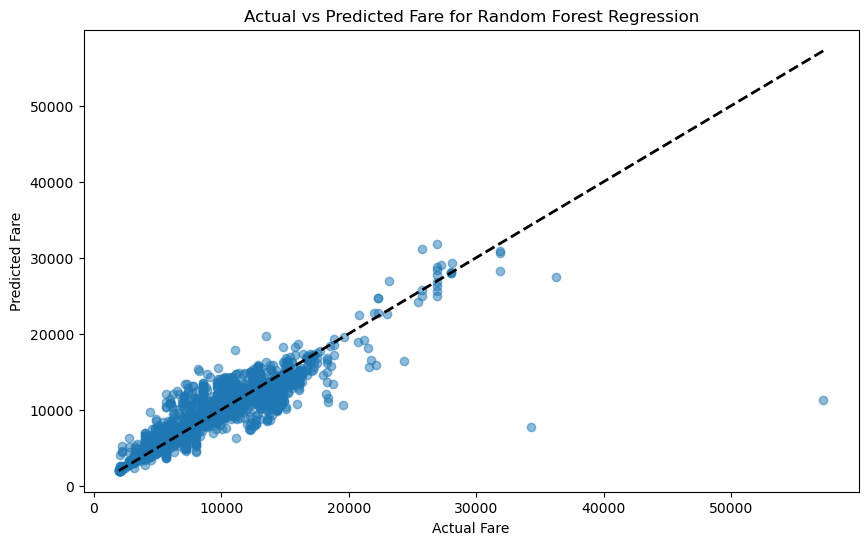

In [73]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare for Random Forest Regression')
# Add a dashed line at y = x
max_value = max(max(y_test), max(y_pred))  # To ensure the line fits the range
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()


In [74]:
from sklearn import metrics

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1180.300991021743
MSE: 4373690.390603711
RMSE: 2091.336986380653


In [76]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [77]:
metrics.r2_score(y_test, y_pred)

0.7971580110519103

In [78]:
## Hyperparameter Tuning


# * Choose following method for hyperparameter tuning
#     1. **RandomizedSearchCV** --> Fast
#     2. **GridSearchCV**
# * Assign hyperparameters in form of dictionery
# * Fit the model
# * Check best paramters and best score

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [81]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [82]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [83]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [84]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [85]:
prediction = rf_random.predict(X_test)

C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_35260\375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


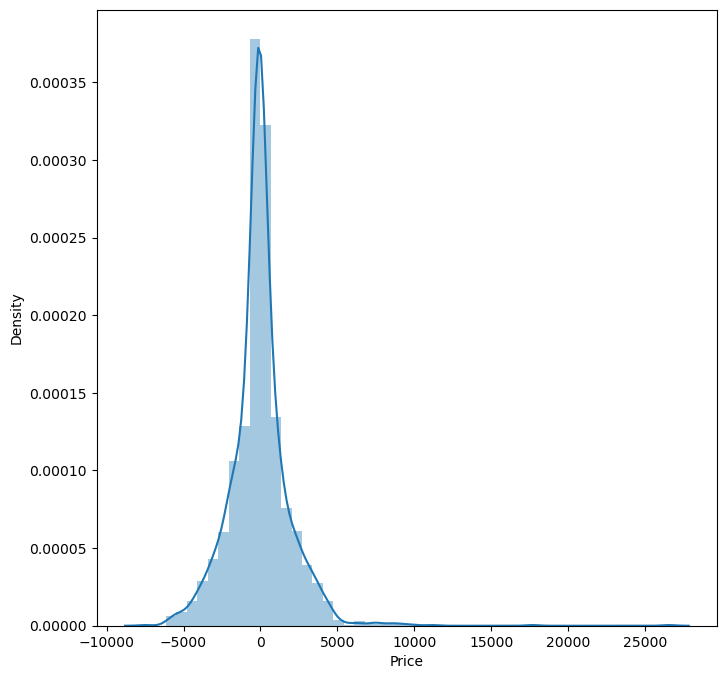

In [86]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

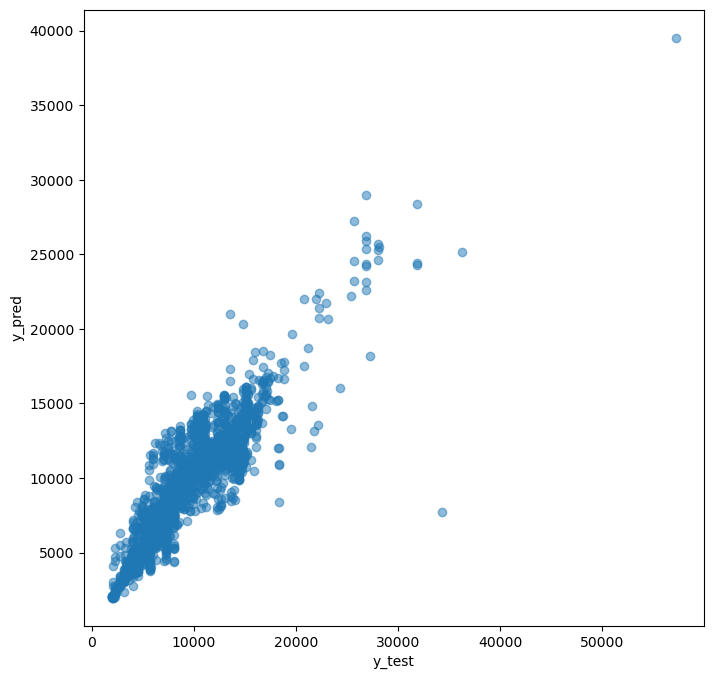

In [87]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

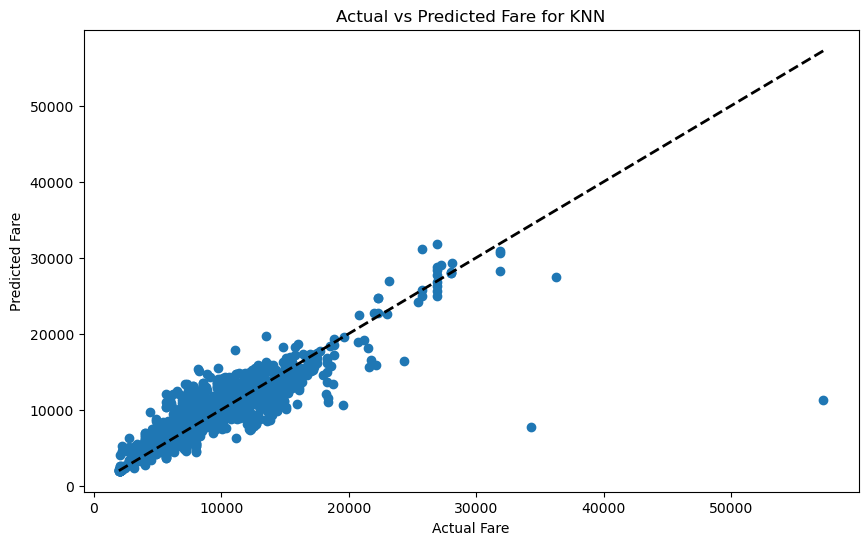

In [88]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare for KNN')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [89]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1261.2701814456677
MSE: 3863401.8242900716
RMSE: 1965.5538212651597


In [90]:
## Save the model to reuse it again

In [91]:
import pickle
# open a file, where you want to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [92]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [93]:
print(X_test.columns)
column_order = X_test.columns.tolist()
print(column_order)

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')
['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premi

In [94]:
y_prediction = forest.predict(X_test)

In [95]:
metrics.r2_score(y_test, y_prediction)

0.7971580110519103

In [96]:
column_order = X_test.columns.tolist()

# Create the sample input with the correct column names and order
sample_input = pd.DataFrame(columns=column_order)

# Populate the sample input with example values
sample_input.loc[0] = [
    0,  # Total_Stops (non-stop)
    15,  # Journey_day
    5,   # Journey_month
    20,  # Dep_hour
    0,  # Dep_min
    22,   # Arrival_hour (replace with actual value)
    45,  # Arrival_min (replace with actual value)
    2,   # Duration_hours (replace with actual value)
    45,  # Duration_mins (replace with actual value)
    0,   # Airline_IndiGo (set to 1 for this airline)
    1,   # Airline_Air India
    0,   # Airline_GoAir
    0,   # Airline_Jet Airways
    0,   # Airline_Jet Airways Business
    0,   # Airline_Multiple carriers
    0,   # Airline_Multiple carriers Premium economy
    0,   # Airline_SpiceJet
    0,   # Airline_Trujet
    0,   # Airline_Vistara
    0,   # Airline_Vistara Premium economy
    0,   # Source_Delhi (set to 1 for this source)
    0,   # Source_Chennai
    0,   # Source_Kolkata
    1,   # Source_Mumbai
    0,   # Destination_Cochin
    0,   # Destination_Hyderabad (set to 1 for this destination)
    0,   # Destination_Delhi
    1,   # Destination_Kolkata
    0    # Destination_New Delhi
]

# Step 2: Predict using the loaded model
y_prediction_sample = forest.predict(sample_input)

# Step 3: Output the predicted fare
print(f"Predicted Flight Fare: {y_prediction_sample[0]}")

Predicted Flight Fare: 4853.61


In [97]:
# R² Score (Coefficient of Determination)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_prediction)
print(f"R² Score: {r2}")

R² Score: 0.7971580110519103


In [98]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_prediction)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1180.300991021743


In [99]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_prediction)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4373690.390603711


In [100]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 2091.336986380653


In [101]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Step 1: Make predictions
y_prediction = forest.predict(X_test)

# Step 2: Calculate metrics
r2 = r2_score(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)

# Step 3: Print results
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


R² Score: 0.7971580110519103
Mean Absolute Error: 1180.300991021743
Mean Squared Error: 4373690.390603711
Root Mean Squared Error: 2091.336986380653


# Justifying the Use of Regression Metrics for Flight Fare Prediction

# Fitting Model Using Linear Regression

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [103]:
from sklearn.linear_model import LinearRegression

# Step 4: Fit the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [104]:
y_prediction = linear_model.predict(X_test)

In [105]:
# Train Score
linear_model.score(X_train, y_train)

0.6240840020468166

In [106]:
# Test Score
linear_model.score(X_test, y_test)

0.61959437290701

In [107]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_prediction)
print("MSE = ", mse)

rmse = np.sqrt(mse)
print("RMSE = ", rmse)

mae = mean_absolute_error(y_test, y_prediction)
print(mae)

r2 = r2_score(y_test, y_prediction)
print("R2 Score = ", r2)

MSE =  8202327.557407134
RMSE =  2863.9705929717807
1972.9372855148047
R2 Score =  0.61959437290701


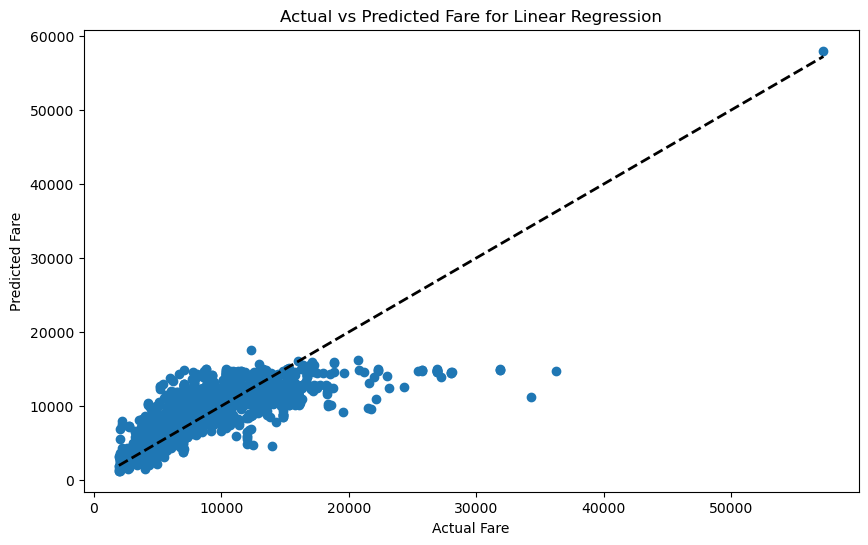

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_prediction)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare for Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# Fitting Model Using XGBoost Regressor

In [109]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [110]:
print(X)

       Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  \
0                0           24              3        22       20   
1                2            1              5         5       50   
2                2            9              6         9       25   
3                1           12              5        18        5   
4                1            1              3        16       50   
...            ...          ...            ...       ...      ...   
10678            0            9              4        19       55   
10679            0           27              4        20       45   
10680            0           27              4         8       20   
10681            0            1              3        11       30   
10682            2            9              5        10       55   

       Arrival_hour  Arrival_min Duration_hours Duration_mins  \
0                 1           10              2            50   
1                13           15         

In [111]:
# Convert 'Duration_hours' and 'Duration_mins' to numeric values
data = X
data['Duration_hours'] = pd.to_numeric(data['Duration_hours'], errors='coerce')
data['Duration_mins'] = pd.to_numeric(data['Duration_mins'], errors='coerce')

C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_35260\2185785380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Duration_hours'] = pd.to_numeric(data['Duration_hours'], errors='coerce')
C:\Users\ASUS Vivobook\AppData\Local\Temp\ipykernel_35260\2185785380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Duration_mins'] = pd.to_numeric(data['Duration_mins'], errors='coerce')


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit to the training data
X_test_scaled = scaler.transform(X_test)

In [114]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [115]:
y_prediction = xgb_model.predict(X_test_scaled)

In [116]:
r2 = r2_score(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)

print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R² Score: 0.8459633442537682
Mean Absolute Error: 1126.700124138139
Mean Squared Error: 3321347.047185769
Root Mean Squared Error: 1822.4563224356762


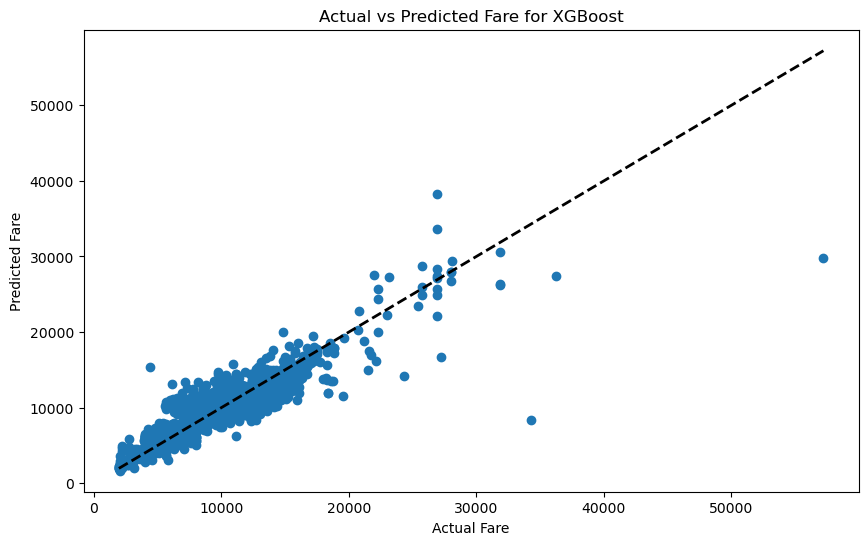

In [117]:
# Plot Actual vs Predicted

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_prediction)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare for XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [118]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Step 1: Define the model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Step 2: Define the parameter grid
param_dist = {
    'n_estimators': np.arange(50, 500, 50),         # Number of boosting rounds
    'max_depth': np.arange(3, 15, 1),               # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2, 0.3],         # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],                   # Proportion of samples used for fitting
    'colsample_bytree': [0.6, 0.8, 1.0],            # Proportion of features used for each tree
    'gamma': [0, 0.1, 0.3, 0.5],                    # Minimum loss reduction required to make a further partition
}

# Step 3: Set up RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,                                    # Number of parameter settings sampled
    scoring='neg_mean_squared_error',              # Metric to evaluate
    cv=5,                                          # Number of folds in cross-validation
    verbose=2,                                     # Verbosity of output
    random_state=42,
    n_jobs=-1                                      # Use all available cores
)

# Step 4: Fit RandomizedSearchCV
xgb_random_search.fit(X_train_scaled, y_train)  # Assuming you have already scaled your features

# Step 5: Retrieve the best parameters and score
best_params = xgb_random_search.best_params_
best_score = -xgb_random_search.best_score_  # Convert to positive MSE

print(f"Best Parameters for XGBoost: {best_params}")
print(f"Best Cross-Validation Score (MSE): {best_score}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for XGBoost: {'subsample': 0.6, 'n_estimators': 450, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.8}
Best Cross-Validation Score (MSE): 3599737.924706552


In [119]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_test and y_prediction are your actual and predicted values respectively
rmse = np.sqrt(mean_squared_error(y_test, y_prediction))

print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 1822.4563224356762


# Fitting Model Using Support Vector Machine

In [120]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [123]:
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

SVR()

In [124]:
y_prediction = svm_model.predict(X_test_scaled)

In [125]:
# Step 7: Calculate metrics
r2 = r2_score(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)

# Step 8: Print results
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R² Score: 0.05596099307369662
Mean Absolute Error: 3412.0229289233957
Mean Squared Error: 20355422.23955071
Root Mean Squared Error: 4511.698376393385


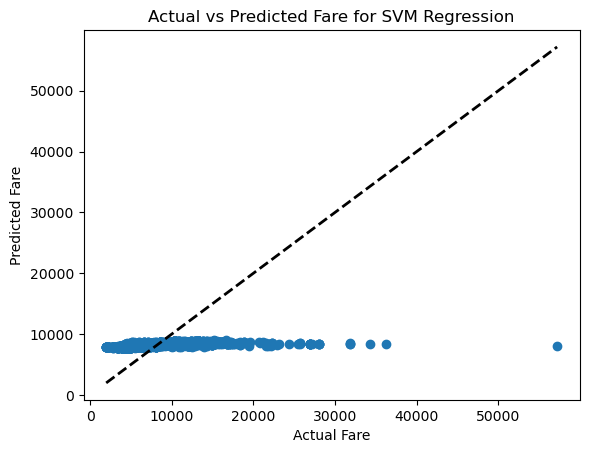

In [126]:
# Step 9: Plot Actual vs Predicted
plt.scatter(y_test, y_prediction)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare for SVM Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# Fitting Model Using Light Gradient Boosting Machine

In [127]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [128]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 8545, number of used features: 25
[LightGBM] [Info] Start training from score 9078.336688


LGBMRegressor(random_state=42)

In [131]:
y_prediction = lgb_model.predict(X_test)

In [132]:
r2 = r2_score(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)

# Step 7: Print results
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R² Score: 0.8258346420388305
Mean Absolute Error: 1243.3366783474683
Mean Squared Error: 3755363.2580765355
Root Mean Squared Error: 1937.8759656068123


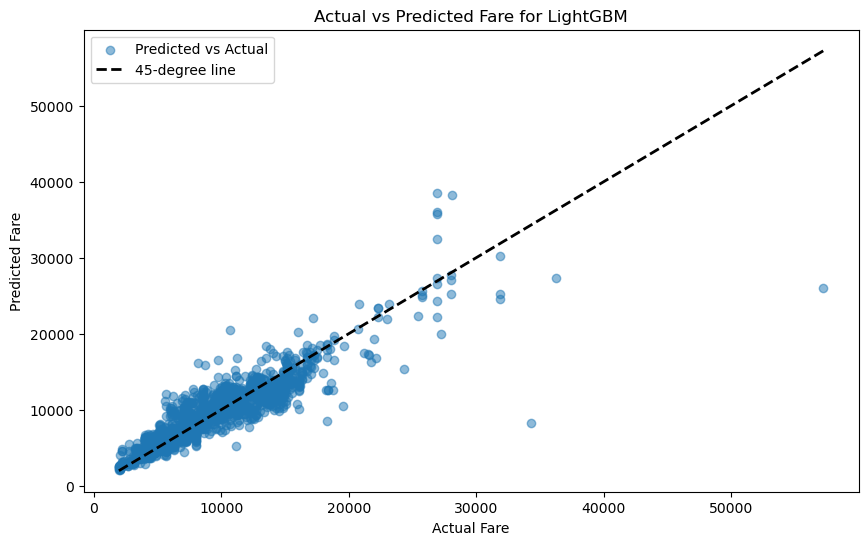

In [133]:
plt.figure(figsize=(10, 6))

# Plot actual vs predicted fares
plt.scatter(y_test, y_prediction, alpha=0.5, label='Predicted vs Actual')

# Set labels and title
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare for LightGBM')

# Add the 45-degree dashed line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='45-degree line')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [134]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the model
lgbm_model = LGBMRegressor()

# Specify the hyperparameter grid
lgbm_param_grid = {
    'num_leaves': [31, 50, 100, 200],
    'max_depth': [-1, 5, 10, 15, 20],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300, 400, 500, 700],
    'subsample': [0.5, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.8, 1.0]
}

# Random search with 5-fold cross-validation
lgbm_random = RandomizedSearchCV(estimator=lgbm_model, param_distributions=lgbm_param_grid, 
                                  scoring='neg_mean_squared_error', n_iter=10, cv=5, 
                                  verbose=2, random_state=42, n_jobs=1)

# Fit the random search model
lgbm_random.fit(X_train_scaled, y_train)

# Best parameters and score
print(f"Best Parameters for LGBM: {lgbm_random.best_params_}")
print(f"Best Score for LGBM: {lgbm_random.best_score_}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 6836, number of used features: 25
[LightGBM] [Info] Start training from score 9132.719280
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=-1, n_estimators=500, num_leaves=50, subsample=0.8; total time=   5.0s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 6836, number of used features: 25
[LightGBM] [Info] Start training from score 9091.6

# Fitting Model Using KNN

In [135]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [138]:
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors based on your dataset
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [139]:
y_prediction = knn_model.predict(X_test_scaled)

In [140]:
r2 = r2_score(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)

In [141]:
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R² Score: 0.7930565535229861
Mean Absolute Error: 1367.541506785213
Mean Squared Error: 4462126.248853533
Root Mean Squared Error: 2112.374552216896


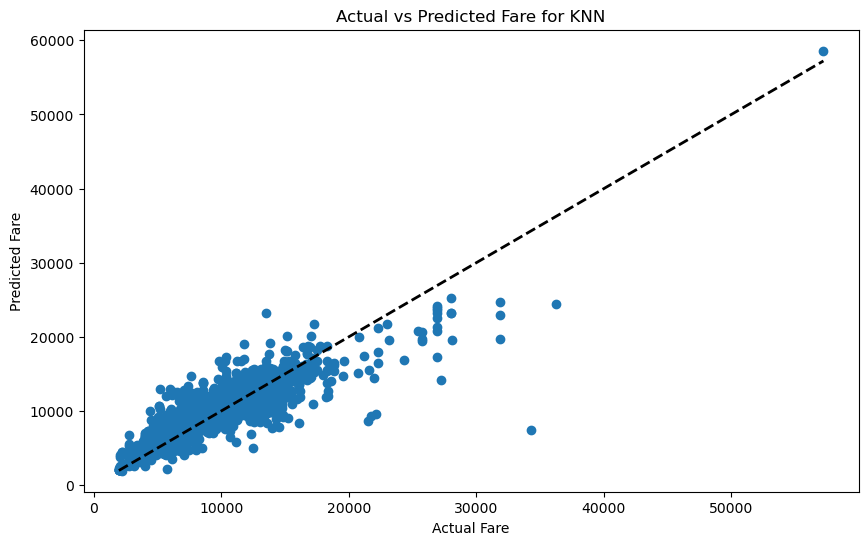

In [142]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_prediction)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare for KNN')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [143]:
from sklearn.neighbors import KNeighborsRegressor

# Define the model
knn_model = KNeighborsRegressor()

# Specify the hyperparameter grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Random search with 5-fold cross-validation
knn_random = RandomizedSearchCV(estimator=knn_model, param_distributions=knn_param_grid, 
                                 scoring='neg_mean_squared_error', n_iter=10, cv=5, 
                                 verbose=2, random_state=42, n_jobs=1)

# Fit the random search model
knn_random.fit(X_train_scaled, y_train)

# Best parameters and score
print(f"Best Parameters for KNN: {knn_random.best_params_}")
print(f"Best Score for KNN: {knn_random.best_score_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END algorithm=ball_tree, n_neighbors=11, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, n_neighbors=11, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, n_neighbors=11, weights=distance; total time=   0.5s
[CV] END algorithm=ball_tree, n_neighbors=11, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, n_neighbors=11, weights=distance; total time=   0.9s
[CV] END algorithm=ball_tree, n_neighbors=9, weights=uniform; total time=   0.6s
[CV] END algorithm=ball_tree, n_neighbors=9, weights=uniform; total time=   0.6s
[CV] END algorithm=ball_tree, n_neighbors=9, weights=uniform; total time=   0.6s
[CV] END algorithm=ball_tree, n_neighbors=9, weights=uniform; total time=   0.7s
[CV] END algorithm=ball_tree, n_neighbors=9, weights=uniform; total time=   0.5s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=distance; total time=   1.1s
[CV] END algorithm=ball_tree, n_neigh

# ROCE Curve

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless


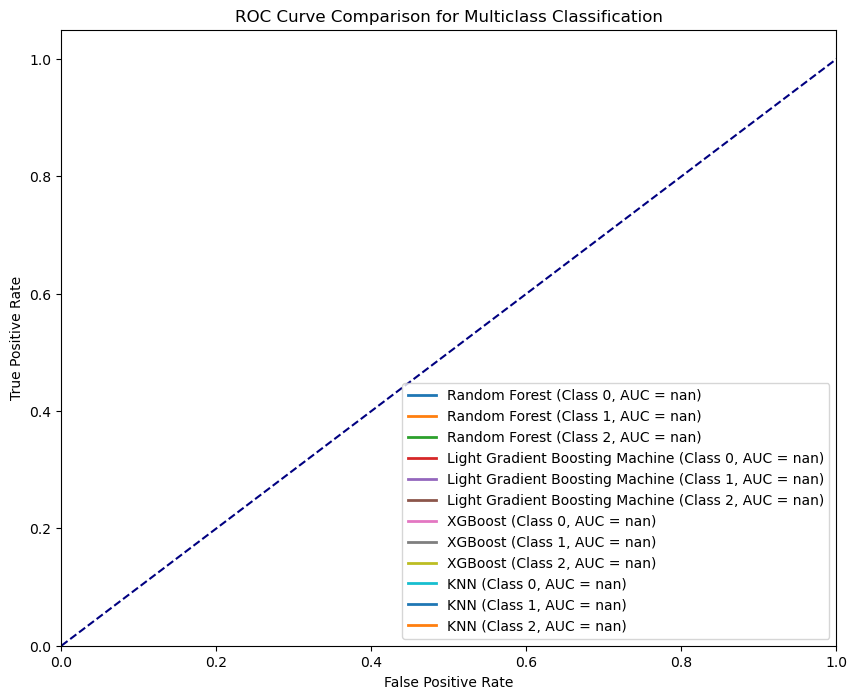

In [151]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

# Assume your data has been preprocessed and split into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Binarize the output (One-vs-Rest format)
y_train = label_binarize(y_train, classes=[0, 1, 2])  # Adjust classes based on the number of labels
y_test = label_binarize(y_test, classes=[0, 1, 2])

# Define the classification models (replace regressor with classifier models)
models = {
    'Random Forest': RandomForestClassifier(),
    'Light Gradient Boosting Machine': LGBMClassifier(),
    'XGBoost': XGBClassifier(),
    'KNN': KNeighborsClassifier()
}

plt.figure(figsize=(10, 8))

# Iterate through models and calculate the ROC curve for each
for name, model in models.items():
    classifier = OneVsRestClassifier(model)  # Use OvR for multiclass classification
    classifier.fit(X_train, y_train)
    
    # Predict probabilities for each class
    if hasattr(classifier, 'predict_proba'):
        y_proba = classifier.predict_proba(X_test)
    else:
        y_proba = classifier.decision_function(X_test)

    # Compute ROC curve and ROC area for each class
    for i in range(y_train.shape[1]):  # Iterate through each class
        fpr, tpr, _ = roc_curve(y_test[:, i], y_proba[:, i])
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{name} (Class {i}, AUC = {roc_auc:.2f})')

# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Add plot labels and legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()
